In [1]:
import os
from glob import glob

import numpy as np

import tensorflow as tf
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# os,getcwd()
# 현재 경로 확인

os.getcwd()

'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\TF_Tutorial_Expert'

In [3]:
# os.listdir()
# 현재 input경로 안에 어떤 파일이 있는지 보여줌

os.listdir(r'C:\Users\LG\Deep_Learning_Study\Tensorflow\dataset\mnist_png\training\0')
main_path = r'C:\Users\LG\Deep_Learning_Study\Tensorflow\dataset\mnist_png\training'

In [4]:
data_paths = glob(main_path + '\*\*.png')

In [5]:
data_paths[-1]

'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\mnist_png\\training\\9\\9998.png'

In [6]:
len(data_paths)

60000

In [7]:
path = data_paths[0]
path

'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\mnist_png\\training\\0\\1.png'

# 데이터 분석 (MNIST)

In [8]:
os.listdir(main_path)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [9]:
len(os.listdir(main_path))

10

In [10]:
label_nums = os.listdir(main_path)
label_nums

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Label 0의 데이터 갯수 확인

In [11]:
len(label_nums)

10

### 데이터 별 갯수 비교

In [12]:
lbl_n = label_nums[0]
main_path + '\\' + lbl_n

'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\mnist_png\\training\\0'

In [13]:
nums_dataset = []

for lbl_n in label_nums:
    data_per_class = os.listdir(main_path + '\\' +lbl_n)
    nums_dataset.append(len(data_per_class))

In [14]:
label_nums

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [15]:
nums_dataset

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

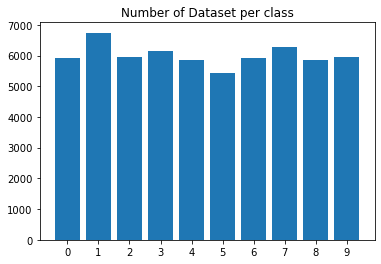

In [16]:
plt.bar(label_nums, nums_dataset)
plt.title('Number of Dataset per class')
plt.show()

# Pillow로 열기

In [17]:
path

'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\mnist_png\\training\\0\\1.png'

In [18]:
image_pil = Image.open(path)
image = np.array(image_pil)

In [19]:
image.shape

(28, 28)

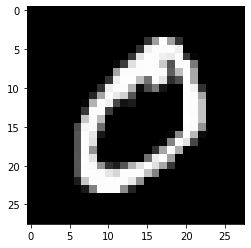

In [20]:
plt.imshow(image, 'gray')
plt.show()

# TensorFlow로 열기

In [21]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [22]:
image.shape

TensorShape([28, 28, 1])

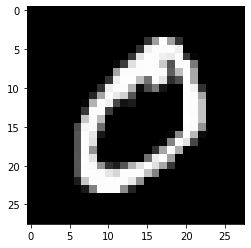

In [23]:
plt.imshow(image[:, :, 0], 'gray')
plt.show()

# Label 얻기

In [24]:
path

'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\mnist_png\\training\\0\\1.png'

In [25]:
label = path.split('\\')[-2]

In [26]:
label

'0'

In [27]:
int(label)

0

In [28]:
def get_label(paht):
    class_name = path.split('\\')[-2]
    label = int(class_name)
    return label

In [29]:
path

'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\mnist_png\\training\\0\\1.png'

In [30]:
get_label(path)

0

# 데이터 이미지 사이즈 알기

In [31]:
from tqdm import tqdm_notebook

In [32]:
heights = []
widths = []

In [33]:
data_paths[:10]

['C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\mnist_png\\training\\0\\1.png',
 'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\mnist_png\\training\\0\\1000.png',
 'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\mnist_png\\training\\0\\10005.png',
 'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\mnist_png\\training\\0\\10010.png',
 'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\mnist_png\\training\\0\\10022.png',
 'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\mnist_png\\training\\0\\10025.png',
 'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\mnist_png\\training\\0\\10026.png',
 'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\mnist_png\\training\\0\\10045.png',
 'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\mnist_png\\training\\0\\10069.png',
 'C:\\Users\\LG\\Deep_Learning_Study\\Tensorflow\\dataset\\mnist_png\\training\\0\\10071.png']

In [34]:
len(data_paths)

60000

In [35]:
img_pil = Image.open(data_paths[0])
image = np.array(img_pil)
image.shape

(28, 28)

In [36]:
for path in tqdm_notebook(data_paths):
    img_pil = Image.open(path)
    image = np.array(img_pil)
    h, w = image.shape
    
    heights.append(h)
    widths.append(w)

C:\Users\LG\Anaconda3\envs\py3.6ten2.0\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [37]:
np.unique(heights)

array([28])

In [38]:
np.unique(widths)

array([28])

In [39]:
np.min(heights), np.max(heights)

(28, 28)

In [40]:
np.min(widths), np.max(widths)

(28, 28)

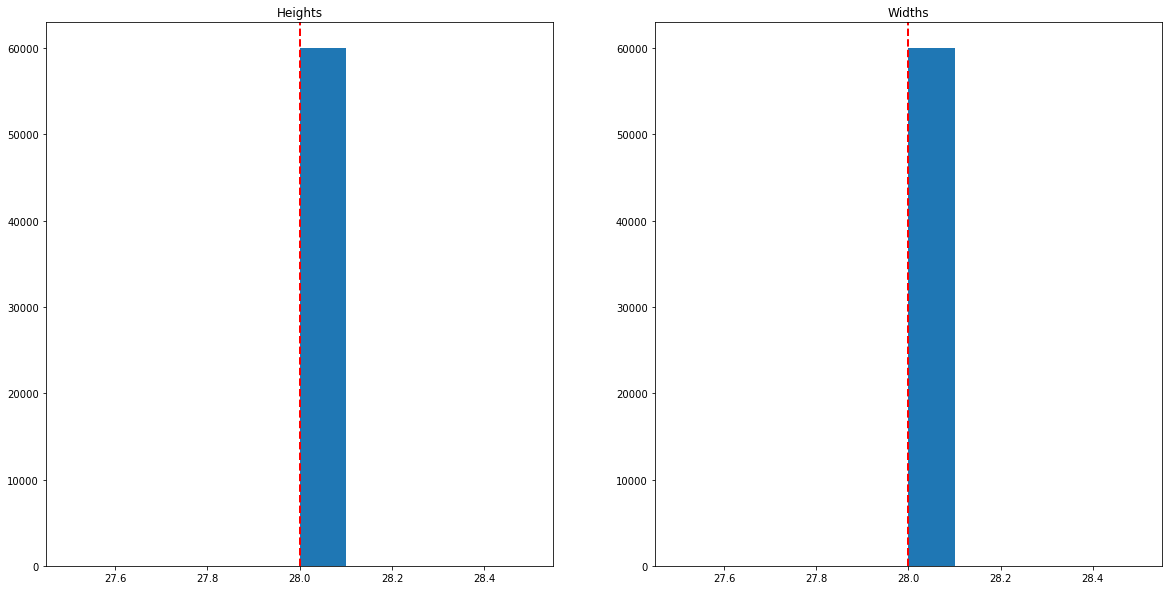

In [43]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.hist(heights)
plt.title('Heights')
plt.axvline(np.mean(heights), color='r', linestyle='--', linewidth=2)

plt.subplot(122)
plt.hist(widths)
plt.title('Widths')
plt.axvline(np.mean(widths), color='r', linestyle='--', linewidth=2)

plt.show()